In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D
import keras.backend as K
import pandas as pd
from keras.datasets import cifar10
from keras.layers import BatchNormalization, Dropout, MaxPooling2D
from keras.optimizers import  Adam

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [5]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(32, 32, 3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size=(2,2), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size=(2,2), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size=(2,2), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size=(2,2), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size=(2,2), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_normal', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu',kernel_initializer='he_normal', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))                                
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        4128      
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
batch_normalization_24 (Batc (None, 16, 16, 64)       

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])
epochs = 20

In [25]:
history = model.fit(X_train, y_train_cat,
          batch_size=128,
          epochs=epochs,
          validation_data=(X_test, y_test_cat),
          shuffle=True)

Epoch 1/20
391/391 [==============================] - 10s 21ms/step - loss: 4.9195 - accuracy: 0.3035 - val_loss: 2.2783 - val_accuracy: 0.2883
Epoch 2/20
391/391 [==============================] - 7s 18ms/step - loss: 1.4597 - accuracy: 0.5828 - val_loss: 1.2317 - val_accuracy: 0.6289
Epoch 3/20
391/391 [==============================] - 7s 18ms/step - loss: 1.1142 - accuracy: 0.6826 - val_loss: 1.2494 - val_accuracy: 0.6384
Epoch 4/20
391/391 [==============================] - 7s 18ms/step - loss: 0.9795 - accuracy: 0.7291 - val_loss: 0.9468 - val_accuracy: 0.7362
Epoch 5/20
391/391 [==============================] - 7s 18ms/step - loss: 0.8860 - accuracy: 0.7640 - val_loss: 0.9376 - val_accuracy: 0.7479
Epoch 6/20
391/391 [==============================] - 7s 18ms/step - loss: 0.8197 - accuracy: 0.7904 - val_loss: 0.8758 - val_accuracy: 0.7679
Epoch 7/20
391/391 [==============================] - 7s 17ms/step - loss: 0.7692 - accuracy: 0.8100 - val_loss: 0.8698 - val_accuracy: 0.771

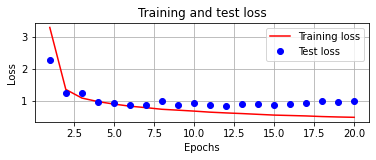

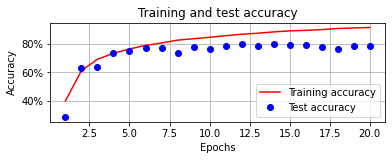

In [26]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values)+1 )

plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()